# Lab 2: Introduction to Python and Jupyter Notebooks, Part II

In this lab session we will continue our introduction to Python/NumPy/Matplotlib. We will see how to perform some basic operation on vectors, matrices, and a special type of matrix, the *image*. 

As usual, before we start, we need to import the needed libraries and set some useful plotting parameters. We can do this by running the code cell below.

In [2]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import math
import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
import matplotlib.pyplot as plt

# show matplotlib figures inline
%matplotlib inline

In [3]:
# By default we set figures to be 6"x4" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(6, 4), dpi=110)
plt.rc('font', size=10)

You'll notice the line [`%matplotlib inline`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) looks very different to all other python code so far. This is a special command just for jupyter notebooks which will plot the figures inline and doesn't require a call to [`plt.show()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html).

## 1. Functions 

Let's start creating a function called `test_normal(n, mean_dist, var_dist)` that generates a *random sequence* of `n` numbers from the normal distribution $\mathcal{N}(\mu, \sigma^2)$ and returns the *mean* and *var* of the *sequence*. 

### Default Value Parameters
Python allows you to have default values for parameters if you want them to be optional. For example if we define the function as `test_normal(n=100, mean_dist=5.0, var_dist=2.0)` then we can actually call the function using `test_normal()` and pass no parameters. We could also call the function using `test_normal(var_dist=10, mean_dist=0.5)`. You can find more info [here](https://www.programiz.com/python-programming/function-argument).

Write the function so that when no parameters are passed it generates a sequence of 10000 elements from the distribution $\mathcal{N}(0, 1)$. 

Call the function multiple times with no arguments and observe the output.

Hint: you can use the function [`numpy.random.randn`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) to generate a random sequence from the normal distribution.

In [8]:
def test_normal(n=10000, mean_dist=0, var_dist=1):
  return np.random.normal(mean_dist, math.sqrt(var_dist), n)

test_normal(n=10)

array([-0.40946684, -0.06771077, -0.14086558,  1.32430761, -1.53936896,
        1.31053675, -0.00792772,  0.55395341, -0.37395191,  0.43643327])

### Play now a little with the parameters of the function. 

- What do you observe when you create a sequence with a very small number of elements? 
- What happens when the sequence contains a very large number of elements instead?

## 2. 2D Normal distribution

Given the following 2D normal distribution $\mathcal{N}(\mathbf{\mu},\mathbf{C})$ with:
$$
\mathbf{\mu}=\left [ \begin{array}{c}2\\2\end{array}\right ] \;\;\;\;\;
\mathbf{C}=\left [ \begin{array}{cc}4& 2\\2& 6\end{array}\right ] 
$$

Estimate the probability that the following vectors:

- $x_1 = (1, 2)$
- $x_2 = (2,8)$
- $x_3 = (5,4)$ 

are sampled from the distribution. Hint: use SciPy's function [`stats.multivariate_normal.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html).

In [13]:
vectors = [[1, 2], [2, 8], [5, 4]]
mu = [2, 2]
c = np.array([[4, 2], [2, 6]])
print(c)

for vec in vectors:
  print(stats.multivariate_normal.pdf(vec, mu, c))

[[4 2]
 [2 6]]
0.030630984921987542
0.0009724001092355
0.011268509615631653


### Observe the obtained values. Which vector has the highest likelihood? Why?

## 3. Random vectors

Generate a sequence of 100 random vectors from the 2D distribution above using the function [`stats.multivariate_normal.rvs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html).

In [18]:
seq = stats.multivariate_normal.rvs(mu, c, 100)
print(seq)

[[ 0.82540908  4.49026871]
 [ 2.71566205  1.15387821]
 [ 1.72289531  3.40778562]
 [ 2.17465497  0.84989154]
 [ 7.38660964  4.60989251]
 [ 4.41388435  1.02216657]
 [ 1.95970885  1.78760056]
 [ 2.771542    1.34997625]
 [ 1.10290615 -0.19472513]
 [ 4.28046881  6.4402216 ]
 [-1.19554987  5.5194751 ]
 [ 5.17497177  8.83306874]
 [ 2.53286676  3.46550136]
 [ 3.24779053  2.07825131]
 [-0.08695804  5.44478039]
 [ 4.3157605   6.82672216]
 [ 0.99377306  1.27796153]
 [ 3.0091657   3.35868873]
 [ 0.2791244   1.36105062]
 [ 1.63553977  4.75135233]
 [-2.20968637  1.11542801]
 [ 2.12181734  0.25860856]
 [-0.00908612  4.88342772]
 [ 3.13549962  3.42152388]
 [ 1.74249276 -2.05989088]
 [ 2.00337184  1.13365725]
 [ 3.23858766  3.42534557]
 [ 1.52753213  2.87543969]
 [ 4.83062374  6.8419936 ]
 [ 2.87461586  1.67463172]
 [ 2.42447182  1.29039419]
 [-0.41073825 -3.81983171]
 [ 5.6875217   5.50062919]
 [ 0.89540157 -1.45382879]
 [ 1.63141809  1.84106498]
 [ 6.01524029  8.08797716]
 [ 0.02747542  2.56319701]
 

Create now a scatter plot of the sequence using the function [`plt.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). Compute the mean and covariance for the sequence using the functions [`np.mean`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.mean.html) (consider the `axis` parameter) and [`np.cov`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cov.html) (consider the `rowvar` parameter).

Mean: 2.018474147791515
Covariance: [[ 6.71559806 -2.86185928  3.08744324 ...  7.47254192 -5.55929474
  -4.23206063]
 [-2.86185928  1.21958439 -1.31571723 ... -3.18443171  2.36909939
   1.80349716]
 [ 3.08744324 -1.31571723  1.41942768 ...  3.43544221 -2.55584191
  -1.9456565 ]
 ...
 [ 7.47254192 -3.18443171  3.43544221 ...  8.31480417 -6.18590669
  -4.70907434]
 [-5.55929474  2.36909939 -2.55584191 ... -6.18590669  4.60208573
   3.5033771 ]
 [-4.23206063  1.80349716 -1.9456565  ... -4.70907434  3.5033771
   2.66697576]]


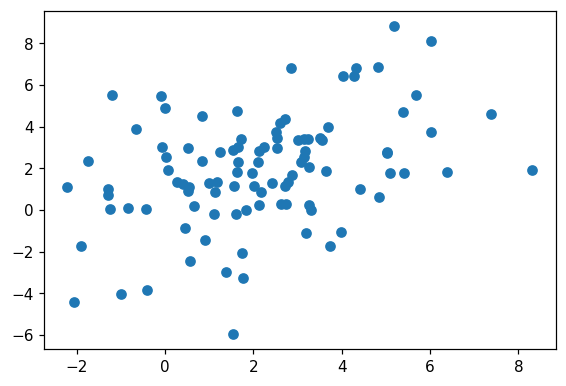

In [22]:
plt.scatter(seq[:,0], seq[:,1])

mean = np.mean(seq)
print(f"Mean: {mean}")

cov = np.cov(seq)
print(f"Covariance: {cov}")
      

Let's increase now the length of the sequence to 4000. Plot the new data and compute the new mean and covariance.

Mean: 2.018474147791515
Covariance: [[ 6.71559806 -2.86185928  3.08744324 ...  7.47254192 -5.55929474
  -4.23206063]
 [-2.86185928  1.21958439 -1.31571723 ... -3.18443171  2.36909939
   1.80349716]
 [ 3.08744324 -1.31571723  1.41942768 ...  3.43544221 -2.55584191
  -1.9456565 ]
 ...
 [ 7.47254192 -3.18443171  3.43544221 ...  8.31480417 -6.18590669
  -4.70907434]
 [-5.55929474  2.36909939 -2.55584191 ... -6.18590669  4.60208573
   3.5033771 ]
 [-4.23206063  1.80349716 -1.9456565  ... -4.70907434  3.5033771
   2.66697576]]


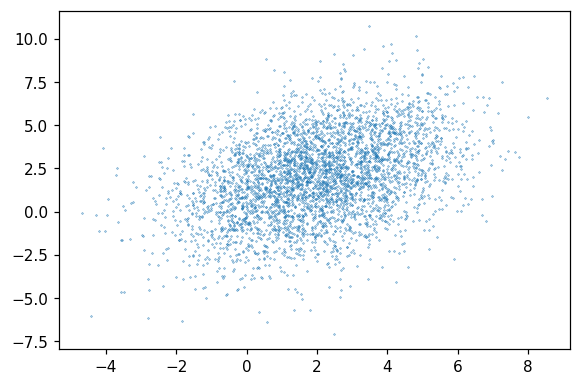

In [25]:
newSeq = stats.multivariate_normal.rvs(mu, c, 4000)

plt.scatter(newSeq[:,0], newSeq[:,1], s=0.1)

newMean = np.mean(seq)
print(f"Mean: {newMean}")

newCov = np.cov(seq)
print(f"Covariance: {newCov}")

### Compare the two scatter plots above. What do you observe?

## 4. Matrix Inverse

Create a function that takes a 2x2 matrix and returns its inverse.

Recall that the inverse of a 2x2 matrix
$$
\mathbf{A}=\left [ \begin{array}{cc}
    a & b \\
    c & d\end{array}\right ]
$$

is

$$
\mathbf{A}^{-1} = 
    \frac{1}{\det(\mathbf{A})} \left [ \begin{array}{cc}
        d & -b \\
        -c & a\end{array}\right ]
$$

where

$$\det{(\mathbf{A})} = ad - bc$$

### Before coding, answer the following question:

Given the definition above, are there any conditions you need to check before calculating the inverse of a matrix in your function?

In [6]:
A = np.array([[1, 2], [3, 4]])

def my_inverse(A):
  det = 1 / ((A[0, 0] * A[1, 1]) - (A[0, 1] * A[1, 0]))
  return det * np.array([[A[1, 1], -A[0, 1]], [-A[1, 0], A[0, 0]]])

my_inverse(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Call now the function passing different random 2x2 matrices.

Try also your function with a singular 2x2 matrix and a random 2x3 matrix and make sure your code does not crash!

In [ ]:
# write your code here

Obviously, there was already a function in NumPy to calculate the inverse of a matrix, which is the function [`np.linalg.inv`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html#numpy.linalg.inv). 

Compare now the results obtained with your function with those obtained with the NumPy one. Note that if you coded the function right, you should get the exact same results!

In [7]:
np.linalg.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

## 5. Loading images with Python

We will use the [scikit-image](https://scikit-image.org/) library to load, show and perform some operation on images. 

We have already imported all the needed functions in the first code cell of this notebook.

Let's now load the image `flower.png` using the function [`io.imread`](http://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread) and let's display the image using the function [`io.imshow`](http://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imshow).

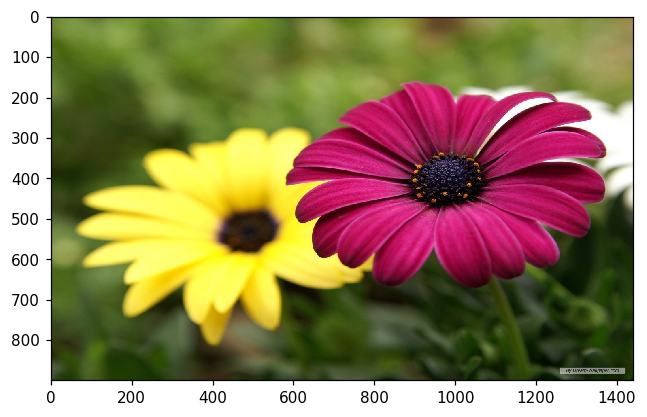

In [9]:
im = io.imread("flower.png")
io.imshow(im)

Remember that images can be interpreted as *matrices*. In fact, the scikit-image library stores images as NumPy arrays. 

Such arrays are either 2D, for grey scale images, or 3D, for colour images.

In the grey scale case, the 2D array simply stores the intensity value of each pixel. Usually values are in the range `[0, 255]` (8 bit images), but other ranges are also possible, such as `[0, 1]`.

In the colour case, the third dimension represents one of the three `[R, G, B]` colour channels. Each channel can be seen as a grey scale image which stores the intensity value of the corresponding colour. By combining the three colours we can obtain all the [other colours](https://en.wikipedia.org/wiki/RGB_color_model).

#### Note:
* A number of different colour models exist, such as CMY or HSL. Depending on the used colour model, pixels in matrices are organised in different ways. Here we assume we are dealing only with the RGB colour model, which is the predominant model for monitors, and thus assume our matrices are in the form seen above. You can learn more about this topic [here](https://en.wikipedia.org/wiki/Color_space) and [here](https://en.wikipedia.org/wiki/Color_model#CMYK_color_model)

We can check the size/shape of an image/matrix by using the property `shape` of NumPy's arrays. 

In [11]:
print('Image shape:', im.shape)

Image shape: (900, 1440, 3)


In our case, the flower image has resolution 1440x900. Note how rows represent the height of the image, while columns represent its width. Since our image is in colours, we have a 3D array.

## 6. Image manipulation

Let's convert our colour image to a grey scale one using the function [`color.rgb2gray`](http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray). Let's then change the size of the image to half its current size using the function [`transform.resize`](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize).

Print both images' size to check your operation was perfomed correctly.

Grey shape: (900, 1440)
Halved grey shape: (450, 720, 3)


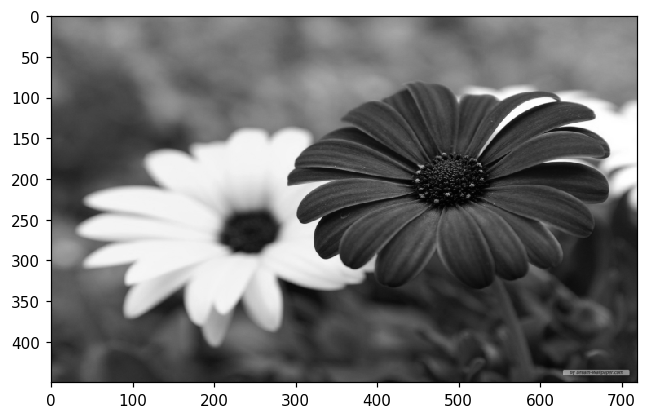

In [14]:
grey = color.rgb2gray(im)
half = transform.resize(grey, (450, 720, 3))

print('Grey shape:', grey.shape)
print('Halved grey shape:', half.shape)

## 7. Image interpretation

Calculate the histogram of your grey scale image's pixel values using the function [`exposure.histogram`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.histogram).

You can use the following function `imhist` to plot the histogram.

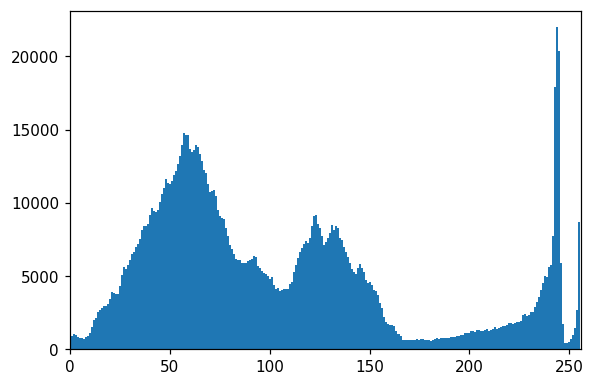

In [15]:
def imhist(img_hist):
    fig, ax = plt.subplots()
    ax.bar( range(256), img_hist[0], width=1 )
    ax.set_xlim(0, 256)

imhist(exposure.histogram(grey))

### What can we tell about the image by looking at the histogram? 

Recall we plotted the histogram of the grey scale image, and recall that our pixels have values ranging from 0 (black) to 255 (white).

## 8. Image Interpretation  II

Use the function [`exposure.equalize_hist`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist) to [equalize](https://en.wikipedia.org/wiki/Histogram_equalization) the image. Show the image and its corresponding histogram.

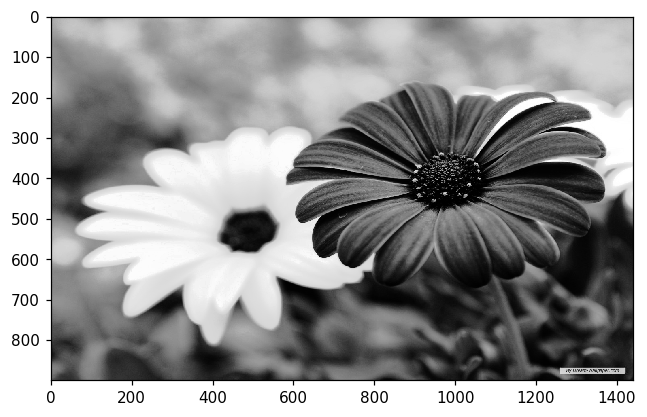

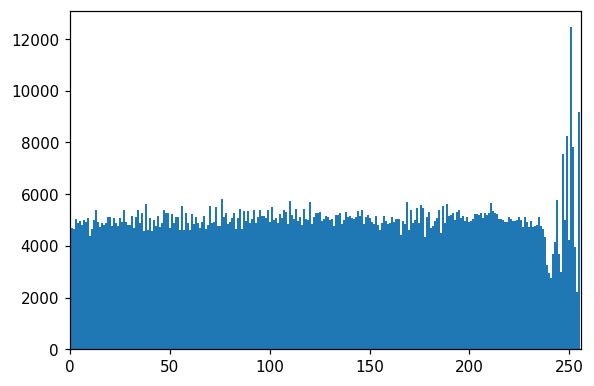

In [16]:
equalised = exposure.equalize_hist(grey)

io.imshow(equalised)

imhist(exposure.histogram(equalised))

### Observe the resulting image and its histogram. What can we tell about the equalised image? 